In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datacompy

In [2]:
'''the get_agrodata function loops through all the csv files in our agronomist data path,melts each dataframe so as to create new 
columns variable and value_agronomist which contain the response variable and values per response variables respectively
This creates a uniform structure in both datasets'''
def get_agrodata(dataset_path):
    list_df =[]
    all_files = glob.glob(dataset_path+ "/*.csv")
    for f in all_files:
        df = pd.read_csv(f,sep=',')
        df = df.melt(id_vars=['Trial ID', 'reps', 'Plot No.', 'Rate Unit', 'Appl Timing'], var_name='variable', 
        value_name="value_agronomist")
        df[['variable','sample__planned_growth_stage']] = df.variable.str.split(" ",expand=True)
        list_df.append(df)
    df_agro = pd.concat(list_df,ignore_index=True)
    return df_agro    

In [3]:
DATASET_PATH = "data/agronomist"
df = get_agrodata(DATASET_PATH)
df.head()

,Trial ID,reps,Plot No.,Rate Unit,Appl Timing,variable,value_agronomist,sample__planned_growth_stage
0,alanine-cup-tango-hotel-oven-pasta,1,103,,,dry_weight_g,15.76,V6-V7
1,alanine-cup-tango-hotel-oven-pasta,2,201,,,dry_weight_g,16.12,V6-V7
2,alanine-cup-tango-hotel-oven-pasta,3,304,,,dry_weight_g,12.16,V6-V7
3,alanine-cup-tango-hotel-oven-pasta,4,403,,,dry_weight_g,5.48,V6-V7
4,alanine-cup-tango-hotel-oven-pasta,5,507,,,dry_weight_g,9.68,V6-V7


In [4]:
(df.isnull().sum()).sum()

0

In [5]:
df.variable.unique()

array(['dry_weight_g', 'total_n_g'], dtype=object)

In [6]:
#check for empty values
df[df['value_agronomist']==' '].shape

(460, 8)

In [7]:
#replace all empty cells with 0
df = df.replace(r'^\s*$', 0, regex=True)
df.value_agronomist = df.value_agronomist.astype('float64')

In [8]:
dw = pd.read_csv("data/data_warehouse/dw_data.csv")
dw.head()

,protocol__name,experiment__name,experiment__trial_id,plot__name,plot__lookup_key,sample__name,sample__planned_growth_stage,sample__items_per_sample,measurement_name,measurement_date,analytical_method,variable,value
0,20-ZEAMX-US403,FTR355,nine-texas-march-texas-chicken-hotel,FTR355.BLOCK01.REP01.PLOT101,101,FTR355.BLOCK01.REP01.PLOT101.T.002,VT,3,FTR355.BLOCK01.REP01.PLOT101.T.002.01,2020-08-07 13:32:59,NaN,dry_weight_g,361.5
1,20-ZEAMX-US403,FTR336,may-march-bacon-winter-batman-white,FTR336.BLOCK01.REP01.PLOT101,101,FTR336.BLOCK01.REP01.PLOT101.T.003,VT,3,FTR336.BLOCK01.REP01.PLOT101.T.003.01,2020-10-12 12:27:00,NaN,dry_weight_g,255.0
2,20-ZEAMX-US403,FTR336,may-march-bacon-winter-batman-white,FTR336.BLOCK01.REP02.PLOT201,201,FTR336.BLOCK01.REP02.PLOT201.T.003,VT,3,FTR336.BLOCK01.REP02.PLOT201.T.003.01,2020-10-12 12:27:00,NaN,dry_weight_g,311.7
3,20-ZEAMX-US403,FTR336,may-march-bacon-winter-batman-white,FTR336.BLOCK01.REP04.PLOT405,405,FTR336.BLOCK01.REP04.PLOT405.T.002,VT,3,FTR336.BLOCK01.REP04.PLOT405.T.002.01,2020-10-12 12:27:00,NaN,dry_weight_g,256.1
4,20-ZEAMX-US403,FTR336,may-march-bacon-winter-batman-white,FTR336.BLOCK01.REP04.PLOT409,409,FTR336.BLOCK01.REP04.PLOT409.T.002,VT,3,FTR336.BLOCK01.REP04.PLOT409.T.002.01,2020-10-12 12:27:00,NaN,dry_weight_g,269.9


In [9]:
#rename columns for uniformity
dw.rename(columns={'experiment__trial_id':'Trial ID','plot__lookup_key':'Plot No.'},inplace=True)
dw.sample()

,protocol__name,experiment__name,Trial ID,plot__name,Plot No.,sample__name,sample__planned_growth_stage,sample__items_per_sample,measurement_name,measurement_date,analytical_method,variable,value
107,20-ZEAMX-US403,FTR337,delaware-queen-angel-artist-green-south,FTR337.BLOCK01.REP04.PLOT402,402,FTR337.BLOCK01.REP04.PLOT402.T.002,VT,3,FTR337.BLOCK01.REP04.PLOT402.T.002.01,2020-08-31 12:20:59,NaN,dry_weight_g,251.4


In [10]:
dw['value_dw_adjusted'] = dw['value']/dw['sample__items_per_sample']
dw.sample()

,protocol__name,experiment__name,Trial ID,plot__name,Plot No.,sample__name,sample__planned_growth_stage,sample__items_per_sample,measurement_name,measurement_date,analytical_method,variable,value,value_dw_adjusted
6982,20-ZEAMX-US403,FTR362,mountain-november-chicken-avocado-magazine-oven,FTR362.BLOCK01.REP02.PLOT207,207,FTR362.BLOCK01.REP02.PLOT207.T.002,VT,3,FTR362.BLOCK01.REP02.PLOT207.T.002.01,2020-07-28 15:18:59,combustion,n_pct,2.48,0.826667


In [11]:
dw.isnull().sum()

protocol__name                     0
experiment__name                   0
Trial ID                           0
plot__name                         0
Plot No.                           0
sample__name                       0
sample__planned_growth_stage       0
sample__items_per_sample           0
measurement_name                   0
measurement_date                   0
analytical_method               3339
variable                           0
value                              0
value_dw_adjusted                  0
dtype: int64

In [12]:
#n_samples  : number of samples taken for this plot, variable & growth stage combination according to the data warehouse
plot = dw['Plot No.'].astype('str')
dw['combination'] = plot + "_" + dw['variable'] + "_" +dw['sample__planned_growth_stage'] 

combinations = dw.combination.value_counts()
x = []
for i in dw.combination:
    for index, value in combinations.items():
        if i == index:
            x.append(value)

dw['n_samples'] = x
#dw.drop(['combination'],axis=1,inplace=True)

dw.sample()

,protocol__name,experiment__name,Trial ID,plot__name,Plot No.,sample__name,sample__planned_growth_stage,sample__items_per_sample,measurement_name,measurement_date,analytical_method,variable,value,value_dw_adjusted,combination,n_samples
3154,20-ZEAMX-US403,FTR352,lion-uncle-march-lactose-mexico-vegan,FTR352.BLOCK01.REP03.PLOT306,306,FTR352.BLOCK01.REP03.PLOT306.T.001,V6-V7,5,FTR352.BLOCK01.REP03.PLOT306.T.001.01,2020-07-24 11:10:00,combustion,total_n_g,2.0064,0.40128,306_total_n_g_V6-V7,24


In [13]:
print("Agronomist df shape is",df.shape)
print("Date warehouse df shape is", dw.shape)

Agronomist df shape is (3852, 8)
Date warehouse df shape is (7757, 16)


In [14]:
#number of unique items per column
df.T.apply(lambda x: x.nunique(),axis=1)

Trial ID                          23
reps                               6
Plot No.                          81
Rate Unit                          2
Appl Timing                        2
variable                           2
value_agronomist                2366
sample__planned_growth_stage       2
dtype: int64

In [15]:
dw.T.apply(lambda x: x.nunique(),axis=1)

protocol__name                     1
experiment__name                  30
Trial ID                          30
plot__name                      1258
Plot No.                          81
sample__name                    2678
sample__planned_growth_stage       2
sample__items_per_sample           3
measurement_name                3093
measurement_date                  65
analytical_method                  1
variable                           3
value                           4678
value_dw_adjusted               4973
combination                      486
n_samples                         48
dtype: int64

In [16]:
#finding experimental trial IDs present in the data warehouse data that are not present in the agronomist dataset
list_df = df['Trial ID'].unique().tolist()
list_dw = dw['Trial ID'].unique().tolist()
list(set(list_dw)-set(list_df))

['summer-freddie-colorado-fish-robert-hamper',
 'lactose-vermont-crazy-echo-william-bravo',
 'eighteen-thirteen-foxtrot-cold-carbon-wolfram',
 'may-march-bacon-winter-batman-white',
 'connecticut-leopard-queen-vegan-low-artist',
 'nitrogen-alanine-queen-london-white-nineteen',
 'pizza-venus-fourteen-apart-sierra-crazy']

In [17]:
print("Unique variables in the data warehouse dataset are",dw.variable.unique())
print("Unique variables in the agronomist dataset are",df.variable.unique())

Unique variables in the data warehouse dataset are ['dry_weight_g' 'total_n_g' 'n_pct']
Unique variables in the agronomist dataset are ['dry_weight_g' 'total_n_g']


* We can note that the data warehouse file has more unique trial ids than the trial ID column in the agronomist df, given we expect the datasets to be the same, some may be missing
* The agronomist dataset also doesn't have the 'n_pct' variable 

In [18]:
'''merging the 2 datasets, given that we want to compare the values from both'''
data = pd.merge(dw,df,how='left',left_on=['Trial ID','Plot No.','variable','sample__planned_growth_stage'],
right_on=['Trial ID','Plot No.','variable','sample__planned_growth_stage'])

In [19]:
data.sample()

,protocol__name,experiment__name,Trial ID,plot__name,Plot No.,sample__name,sample__planned_growth_stage,sample__items_per_sample,measurement_name,measurement_date,analytical_method,variable,value,value_dw_adjusted,combination,n_samples,reps,Rate Unit,Appl Timing,value_agronomist
7484,20-ZEAMX-US403,FTR345,arizona-pluto-yellow-apart-eleven-alanine,FTR345.BLOCK01.REP02.PLOT207,207,FTR345.BLOCK01.REP02.PLOT207.T.002,VT,3,FTR345.BLOCK01.REP02.PLOT207.T.002.01,2020-08-11 14:10:59,combustion,n_pct,1.82,0.606667,207_n_pct_VT,46,NaN,NaN,NaN,NaN


In [20]:
new_df = data.loc[:,['Trial ID','Plot No.','sample__planned_growth_stage','sample__items_per_sample','variable',
 'value','value_dw_adjusted' ,'value_agronomist','n_samples']]
new_df.rename(columns={'Plot No.':'plot','sample__items_per_sample':'items_per_sample','value':'value_dw'},inplace=True)
new_df.sample()

,Trial ID,plot,sample__planned_growth_stage,items_per_sample,variable,value_dw,value_dw_adjusted,value_agronomist,n_samples
4495,four-georgia-march-fruit-alanine-steak,608,VT,1,total_n_g,2.25072,2.25072,2.11899,7


In [21]:
#save as csv file
#new_df.to_csv('data/data.csv',index=False)

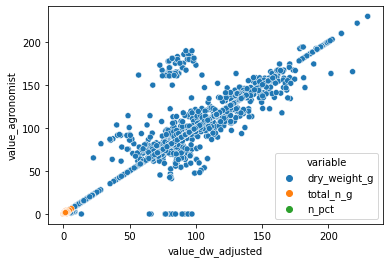

In [22]:
sns.scatterplot(data=new_df, x = "value_dw_adjusted",y = "value_agronomist", hue = "variable")
plt.show()

<AxesSubplot:xlabel='variable', ylabel='count'>

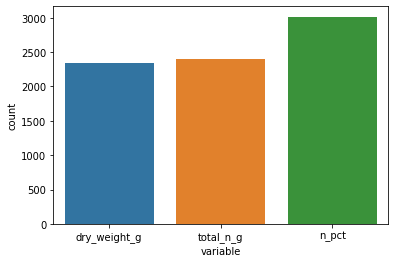

In [23]:
sns.countplot(x='variable',data=new_df)

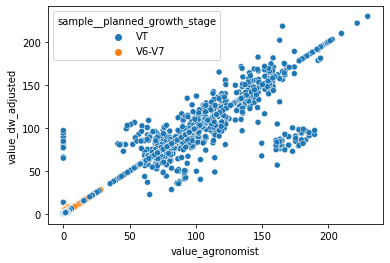

In [24]:
sns.scatterplot(x='value_agronomist',y='value_dw_adjusted',hue='sample__planned_growth_stage',data=new_df)
plt.show()

In [25]:
new_df.sample__planned_growth_stage.value_counts()

VT       4720
V6-V7    3037
Name: sample__planned_growth_stage, dtype: int64

In [26]:
var = new_df.groupby('variable').agg({'value_agronomist':'mean','value_dw_adjusted':'mean'})
var

,value_agronomist,value_dw_adjusted
variable,,
dry_weight_g,63.370616,65.928120
n_pct,NaN,0.835545
total_n_g,1.076731,1.141038


array([<AxesSubplot:title={'center':'value_agronomist'}, xlabel='variable'>,
       <AxesSubplot:title={'center':'value_dw_adjusted'}, xlabel='variable'>],
      dtype=object)

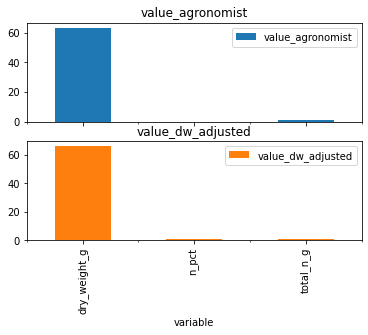

In [27]:
var.plot.bar(subplots=True)

* the warehouse dataset probably has higher averages because it has more trial IDs than the agronomist data
* create a new merged df (inner) with the same trial IDs and see if the values are the same

In [28]:
df.shape

(3852, 8)

In [29]:
df.columns

Index(['Trial ID', 'reps', 'Plot No.', 'Rate Unit', 'Appl Timing', 'variable',
       'value_agronomist', 'sample__planned_growth_stage'],
      dtype='object')

In [30]:
var_df = pd.merge(df,dw,how='inner', on=['Trial ID','Plot No.','sample__planned_growth_stage','variable'])
#retain relevant columns
var_df = var_df.loc[:,['Trial ID','Plot No.','sample__planned_growth_stage','sample__items_per_sample','variable',
 'value','value_dw_adjusted' ,'value_agronomist']]
var_df.rename(columns={'Plot No.':'plot','sample__items_per_sample':'items_per_sample','value':'value_dw'},inplace=True)
var_df.sample()

,Trial ID,plot,sample__planned_growth_stage,items_per_sample,variable,value_dw,value_dw_adjusted,value_agronomist
258,asparagus-zebra-low-winner-floor-december,301,VT,1,dry_weight_g,114.5,114.5,121.0


In [31]:
var_df.shape

(3675, 8)

In [32]:
new_var = var_df.groupby('variable').agg({'value_agronomist':'mean','value_dw_adjusted':'mean'})
new_var

,value_agronomist,value_dw_adjusted
variable,,
dry_weight_g,63.370616,62.291187
total_n_g,1.076731,1.080787


In [33]:
var_df.value_dw_adjusted.isin(var_df.value_agronomist).sum()

721

* Based on how the merging was done, given that the 2 datasets should be identical we expect the values from the agronomist and warehouse datasets to be equal
* But we see that only 721 entries out of 3675 entries, which could be explained by uploading errors and different normalization processes during upload
* we create a new column 'diff' to investigate these differences between the 2 values 

In [34]:
var_df['diff'] = var_df['value_agronomist'] - var_df['value_dw_adjusted']
var_df['diff'].describe()

count    3675.000000
mean        0.541667
std        14.211313
min       -97.066667
25%        -0.000416
50%         0.000000
75%         0.000360
max       104.600000
Name: diff, dtype: float64

In [35]:
var_df['diff'].quantile([.90])

0.9    0.470696
Name: diff, dtype: float64

In [36]:
x = var_df[var_df['diff'] >0.470696]
x['Trial ID'].value_counts()

bakerloo-thirteen-xray-muppet-maine-coffee    108
four-georgia-march-fruit-alanine-steak         80
diet-victor-floor-pluto-fix-pizza              60
asparagus-zebra-low-winner-floor-december      54
red-maine-artist-south-wisconsin-october       48
delaware-queen-angel-artist-green-south        18
Name: Trial ID, dtype: int64

In [37]:
x['variable'].value_counts()

dry_weight_g    307
total_n_g        61
Name: variable, dtype: int64

<h3>Which data are poorly aligned? Generate a concise output (could be graph, table or other) which you might share with another data engineer to help them identify which records need to be investigated further. 

* We use DataCompy for this</h3>

In [38]:
dw.columns.intersection(df.columns)

Index(['Trial ID', 'Plot No.', 'sample__planned_growth_stage', 'variable'], dtype='object')

In [40]:
compare = datacompy.Compare(dw,df,join_columns=['Trial ID', 'Plot No.', 'sample__planned_growth_stage', 'variable'],df1_name='warehouse dataset', df2_name='agronomics dataset')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

            DataFrame  Columns  Rows
0   warehouse dataset       16  7757
1  agronomics dataset        8  3852

Column Summary
--------------

Number of columns in common: 4
Number of columns in warehouse dataset but not in agronomics dataset: 12
Number of columns in agronomics dataset but not in warehouse dataset: 4

Row Summary
-----------

Matched on: trial id, plot no., sample__planned_growth_stage, variable
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 2,952
Number of rows in warehouse dataset but not in agronomics dataset: 4,805
Number of rows in agronomics dataset but not in warehouse dataset: 900

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 2,952

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equa